Exploring the phase space of variables, especially p_T^D. We scan over the 2-body and 3-body parameter space, imagining that each object can have pt in [1, 100].
For the 3rd body, we only choose a few representative values to make plotting in 2D easier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = (14, 8)
mpl.rcParams['font.size'] = 14

In [3]:
kappa, beta = 2, 0

In [4]:
def calc_lambda(obj, kappa):
    return (obj**kappa).sum() / obj.sum()**kappa

## 2-body

In [5]:
x = np.arange(1, 100, 2)
y = np.arange(1, 100, 2)

In [6]:
results = np.zeros(shape=(len(x), len(y)))

In [7]:
for ix, xx in enumerate(x):
    for iy, yy in enumerate(y):
        results[iy][ix] = calc_lambda(np.array([xx, yy]), kappa)

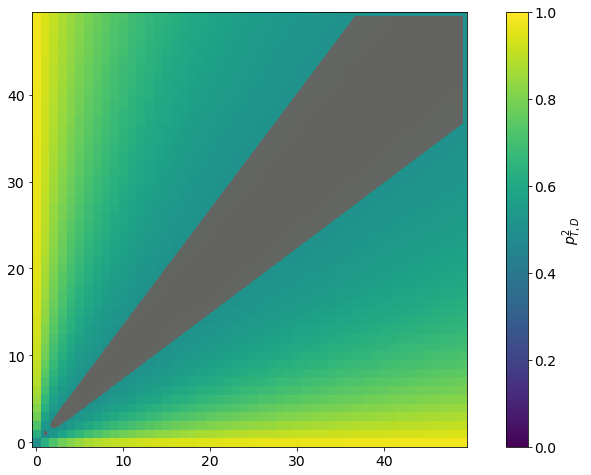

In [8]:
plt.imshow(results, origin='lower', interpolation='none', vmin=0, vmax=1);
plt.colorbar(label=r'$p_{T, D}^{2}$');
CS = plt.contourf(results, levels=[0.5, 0.51], colors=['r'], alpha=0.3)

In [9]:
print(results.min())

0.5


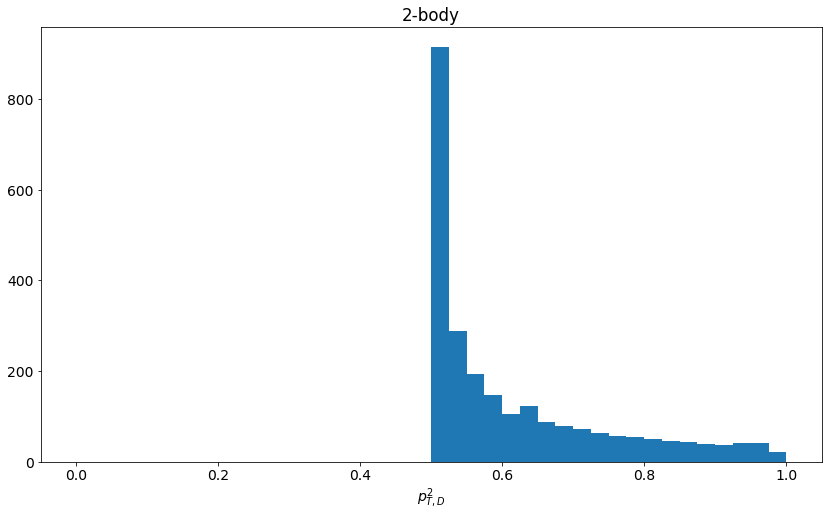

In [12]:
plt.hist(results.reshape(-1), bins=np.arange(0, 1.025, 0.025));
plt.title("2-body");
plt.xlabel(r'$p_{T, D}^{2}$');

So we see that in the 2-body case, the minimum value is 0.5, which occupies a fair amount of the phase space (when x ~ y).
NB x/y axes are indices, *2 to get "physical" value

## 3-body

In [70]:
z = np.arange(1, 100, 20)

In [71]:
results_3d = np.zeros(shape=(len(z), len(y), len(x)))

In [72]:
results_3d.shape

(5, 50, 50)

In [73]:
for iz, zz in enumerate(z):
    for iy, yy in enumerate(y):
        for ix, xx in enumerate(x):
            results_3d[iz][iy][ix] = calc_lambda(np.array([xx, yy, zz]), kappa)


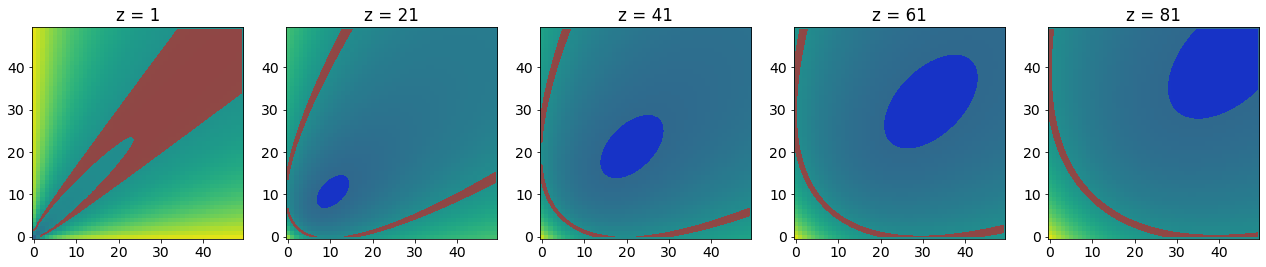

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=int(len(z)/1))
fig.set_size_inches(22, 14)
all_axs = axs.reshape(-1)
for iz, zz in enumerate(z):
    ax = all_axs[iz]
    img = ax.imshow(results_3d[iz], vmin=0, vmax=1, origin='lower', interpolation='none');
    ax.set_title(f"z = {zz}")
#     if iz == len(z)-1:
#         fig.colorbar(img, fraction=0.046, pad=0.04, label=r'$p_{T, D}^{2}$');
    CS = ax.contourf(results_3d[iz], levels=[0.49, 0.51], colors=['r'], alpha=0.5)
    CS2 = ax.contourf(results_3d[iz], levels=[0.329, 0.34], colors=['b'], alpha=0.5)
# plt.tight_layout()

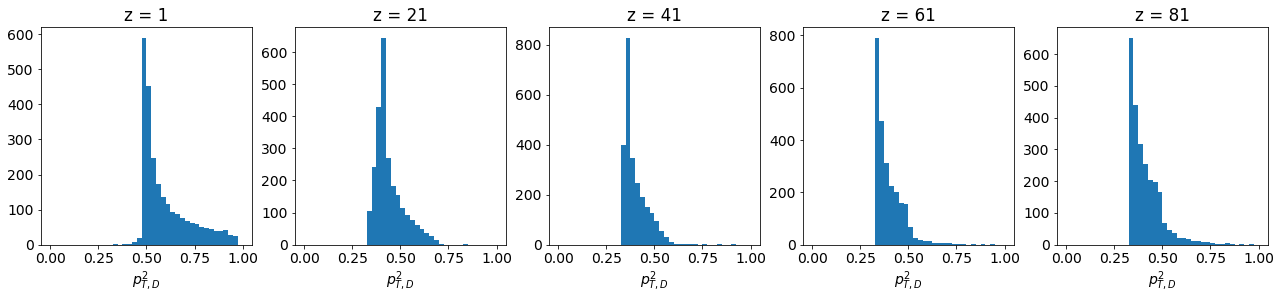

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=len(z))
fig.set_size_inches(22, 4)
all_axs = axs.reshape(-1)
for iz, zz in enumerate(z):
    ax = all_axs[iz]
    ax.hist(results_3d[iz].reshape(-1), bins=np.arange(0, 1.025, .025));
    ax.set_title(f"z = {zz}")
    ax.set_xlabel(r'$p_{T, D}^{2}$')

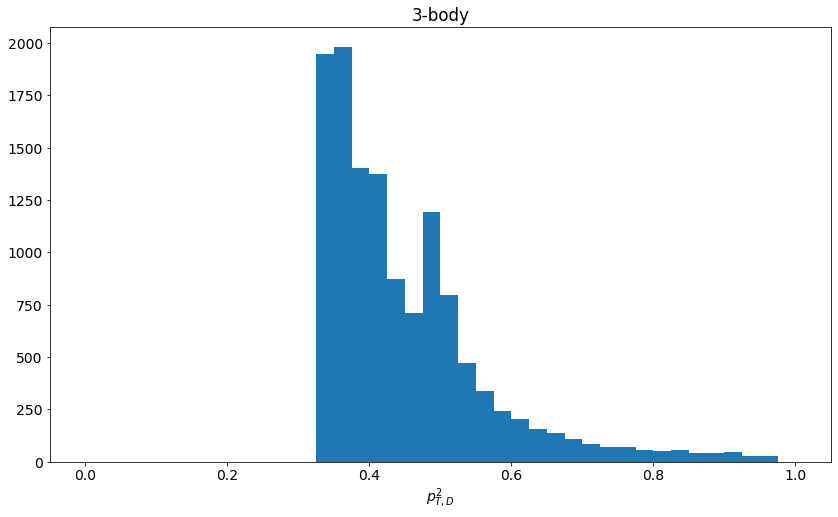

In [76]:
plt.hist(results_3d.reshape(-1), bins=np.arange(0, 1.025, 0.025));
plt.title("3-body");
plt.xlabel(r'$p_{T, D}^{2}$');

In [21]:
results_3d.min()

0.3333333333333333

So we see that:

- when z is << x, y, it's kinda like the 2-body case: a lot of \~0.5 values if x\~y

- when z is comparable to x and y, we get \~0.33

- when z is >> x, y, you can get some large values

- with only 3 bodies, you can't get < 0.3333

- scanning over uniform phase space for all 3 bodies leads to natural peaks at 1/3 and 1/2


## N-bodies, one different, all others same

Let us define the jet as having $n$ particles, each with $p_T = a_i$, for $i=1...n$, where they are ordered s.t. $a_1 > a_2 > a_3 > ... > a_n$.
The sum of pT = $s = \sum_i a_i$

Let us define a particular scenario: in which one particle has the majority of the pT: $a_1 \gg a_2$ (actually moderately realistic for a QCD jet).

We also define $a_1 = fs$, where $f$ is some fraction $\gg 0$.

Then let us also assume that the other $n-1$ particles have similar pT, s.t. $a_{i > 1} = ks$, where $k$ is another fraction, this time much smaller than $f$.

Therefore:

\begin{equation}
k = \frac{s-a_1}{n-1} = \frac{s - fs}{n-1} = s\frac{1-f}{n-1}
\end{equation}

So our pTD can now be expressed as:

\begin{align}
p_{T,D}^2 &= \sum \left( \frac{a_i}{s} \right)^2 \\
&= f^2 + (n-1) \left(\frac{1-f}{n-1} \right)^2 \\
&= f^2 + \frac{(1-f)^2}{n-1}
\end{align}

So we can explore the phase space of $(f, n)$ to see how it affects pTD.

In [22]:
def ptd_one_big(f, n):
    return f**2 + pow((1-f), 2)/ (n-1)

In [37]:
f = np.arange(0.1, 1, 0.01)
n = np.arange(2, 11, 1)  # non-integer to get smooth plot

In [38]:
results = np.zeros(shape=(len(f), len(n)))

In [45]:
results.shape

(90, 9)

In [39]:
for iff, ff in enumerate(f):
    for inn, nn in enumerate(n):
        results[iff][inn] = ptd_one_big(ff, nn)

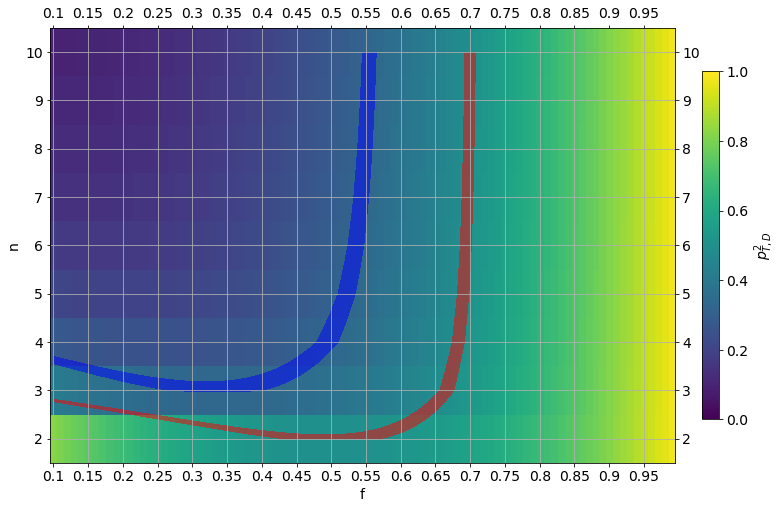

In [42]:
fig = plt.figure(figsize=(12, 8))
img = plt.imshow(results.T, origin='lower', vmin=0, vmax=1, aspect='auto', interpolation='none');
plt.colorbar(img, fraction=0.026, pad=0.04, label=r'$p_{T, D}^{2}$');
plt.gca().tick_params(right=True, top=True, labelright=True, labeltop=True)
plt.yticks(np.arange(0, len(n), 1), ["%g" %g for g in n[::]]);
plt.xticks(np.arange(0, len(f), 5), ["%g" %g for g in f[::5]]);
plt.ylabel('n');
plt.xlabel('f');
plt.grid()
CS = plt.contourf(results.T, levels=[0.49, 0.51], colors=['r'], alpha=0.5);
CS2 = plt.contourf(results.T, levels=[0.32, 0.34], colors=['b'], alpha=0.5);

So we see that in this rough estimate, there are clear bands at f\~0.5-0.55 and f\~0.65-0.7 where pTD is \~0.333 and \~0.5, respectively.

You can see this from the equation in the limit of large $n\gg 1, (1-f)$:

\begin{equation}
p_{T,D}^2 \simeq f^2 + \frac{(1-f)^2}{n} \simeq f^2
\end{equation}

So for 0.5, $f = \sqrt{0.5} = 0.7$, and for 0.333, $f = \sqrt{1/3} = 0.577$

Although this doesn't explain the __exact__ spikes at 0.5 and 1/3.

In [43]:
print([ptd_one_big(f=0.5, n=nn) for nn in [2,3,4,5]])

[0.5, 0.375, 0.3333333333333333, 0.3125]


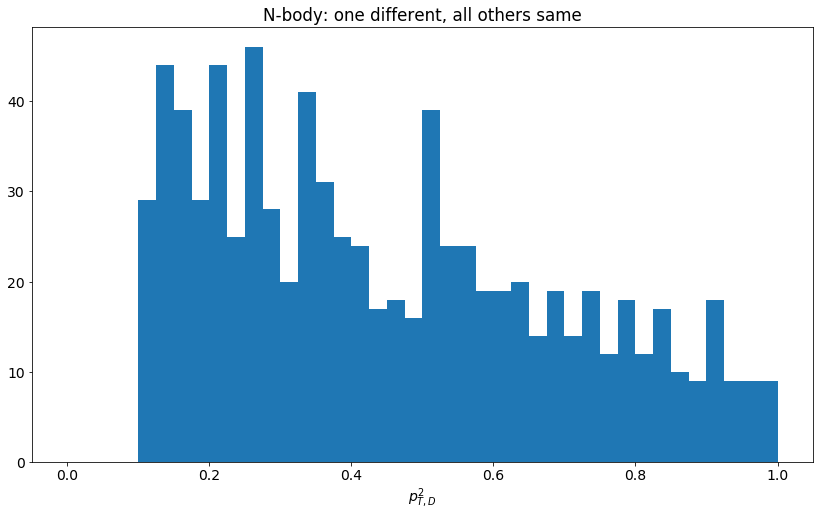

In [46]:
plt.hist(results.reshape(-1), bins=np.arange(0, 1.025, 0.025));
plt.title("N-body: one different, all others same");
plt.xlabel(r'$p_{T, D}^{2}$');

This is a little artifical, but does show some "preferred" values